# Project Proposal

### Stat 201

In [2]:
# Load package
library(tidyverse)
library(GGally)
library(infer)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [10]:
# Read in the forest fires data from https://archive.ics.uci.edu/ml/datasets/forest+fires 
forestfires_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

head(forestfires_data)

Rows: 517 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): month, day
dbl (11): X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


According to common sense, forest fires occur differently in summer and winter, so we chose the two most representative months: February and August, indicating winter and summer respectively

In [18]:
# Filter month of February and July
forestfires_winter_summer <- forestfires_data |>
                             filter(month %in% c("feb", "aug"))
head(forestfires_winter_summer)

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0,0
8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0,0
8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0,0
6,5,aug,fri,63.5,70.8,665.3,0.8,17.0,72,6.7,0,0
7,4,aug,sat,90.2,110.9,537.4,6.2,19.5,43,5.8,0,0
7,4,aug,sat,93.5,139.4,594.2,20.3,23.7,32,5.8,0,0


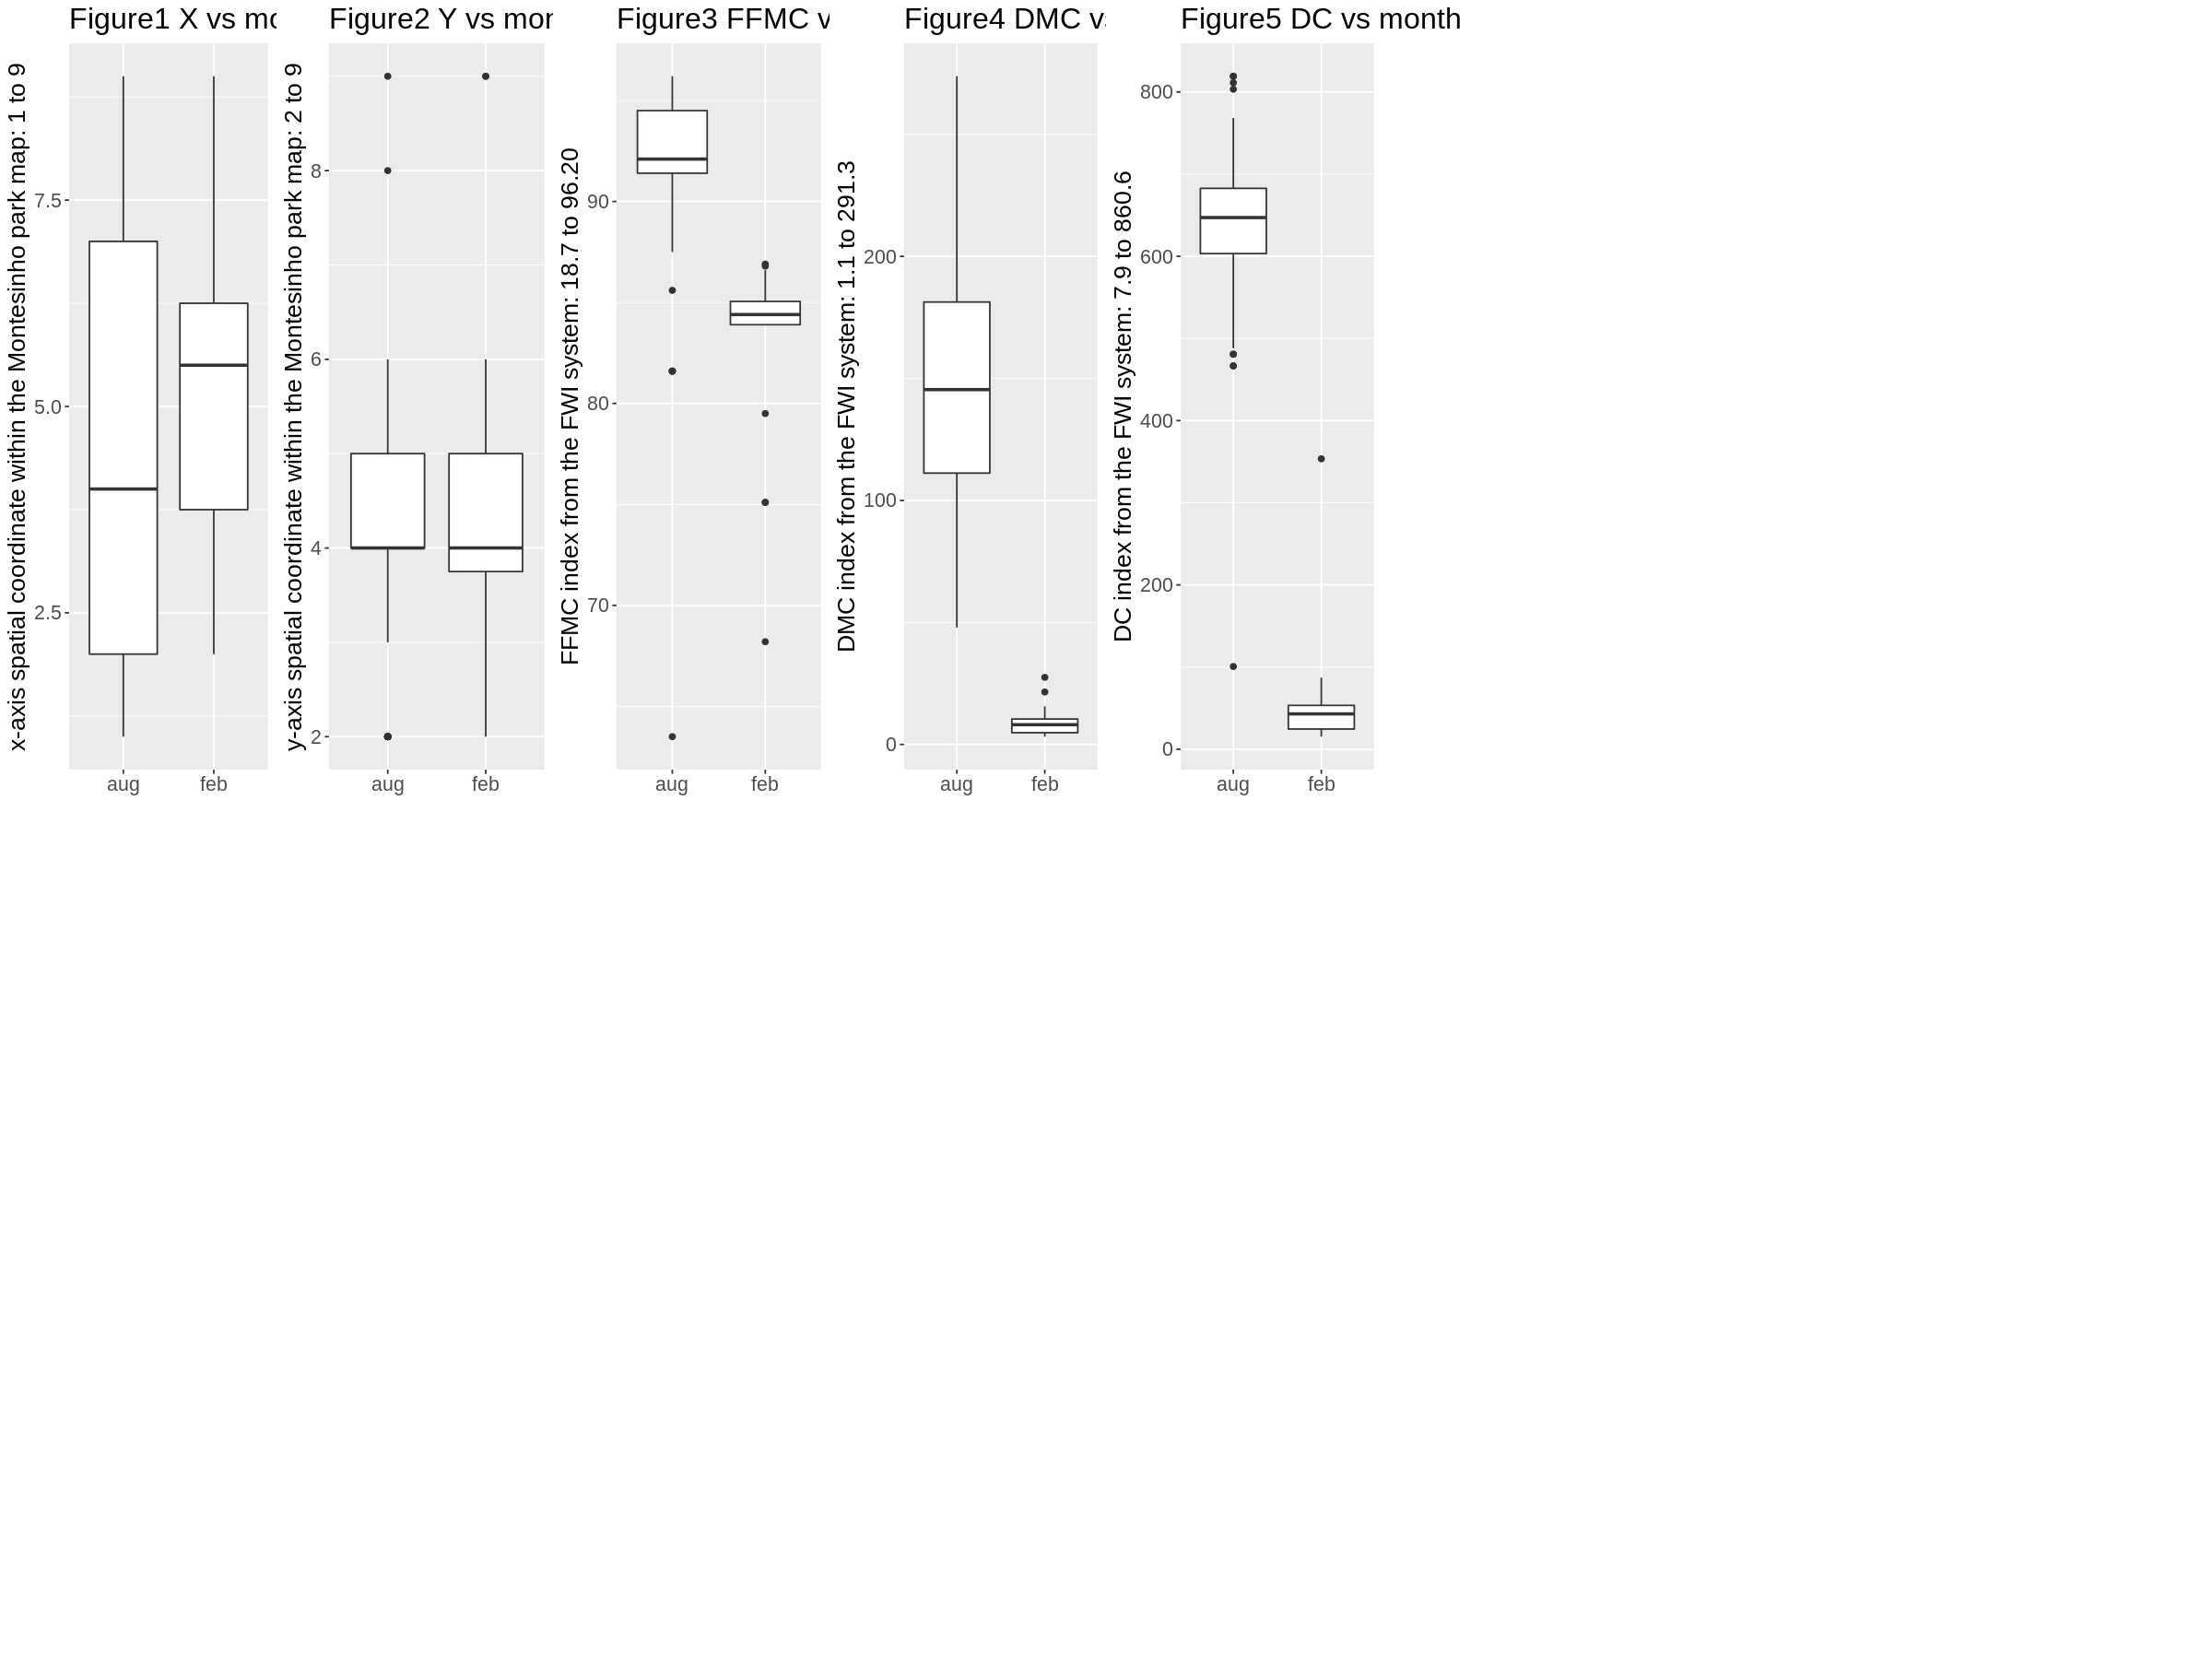

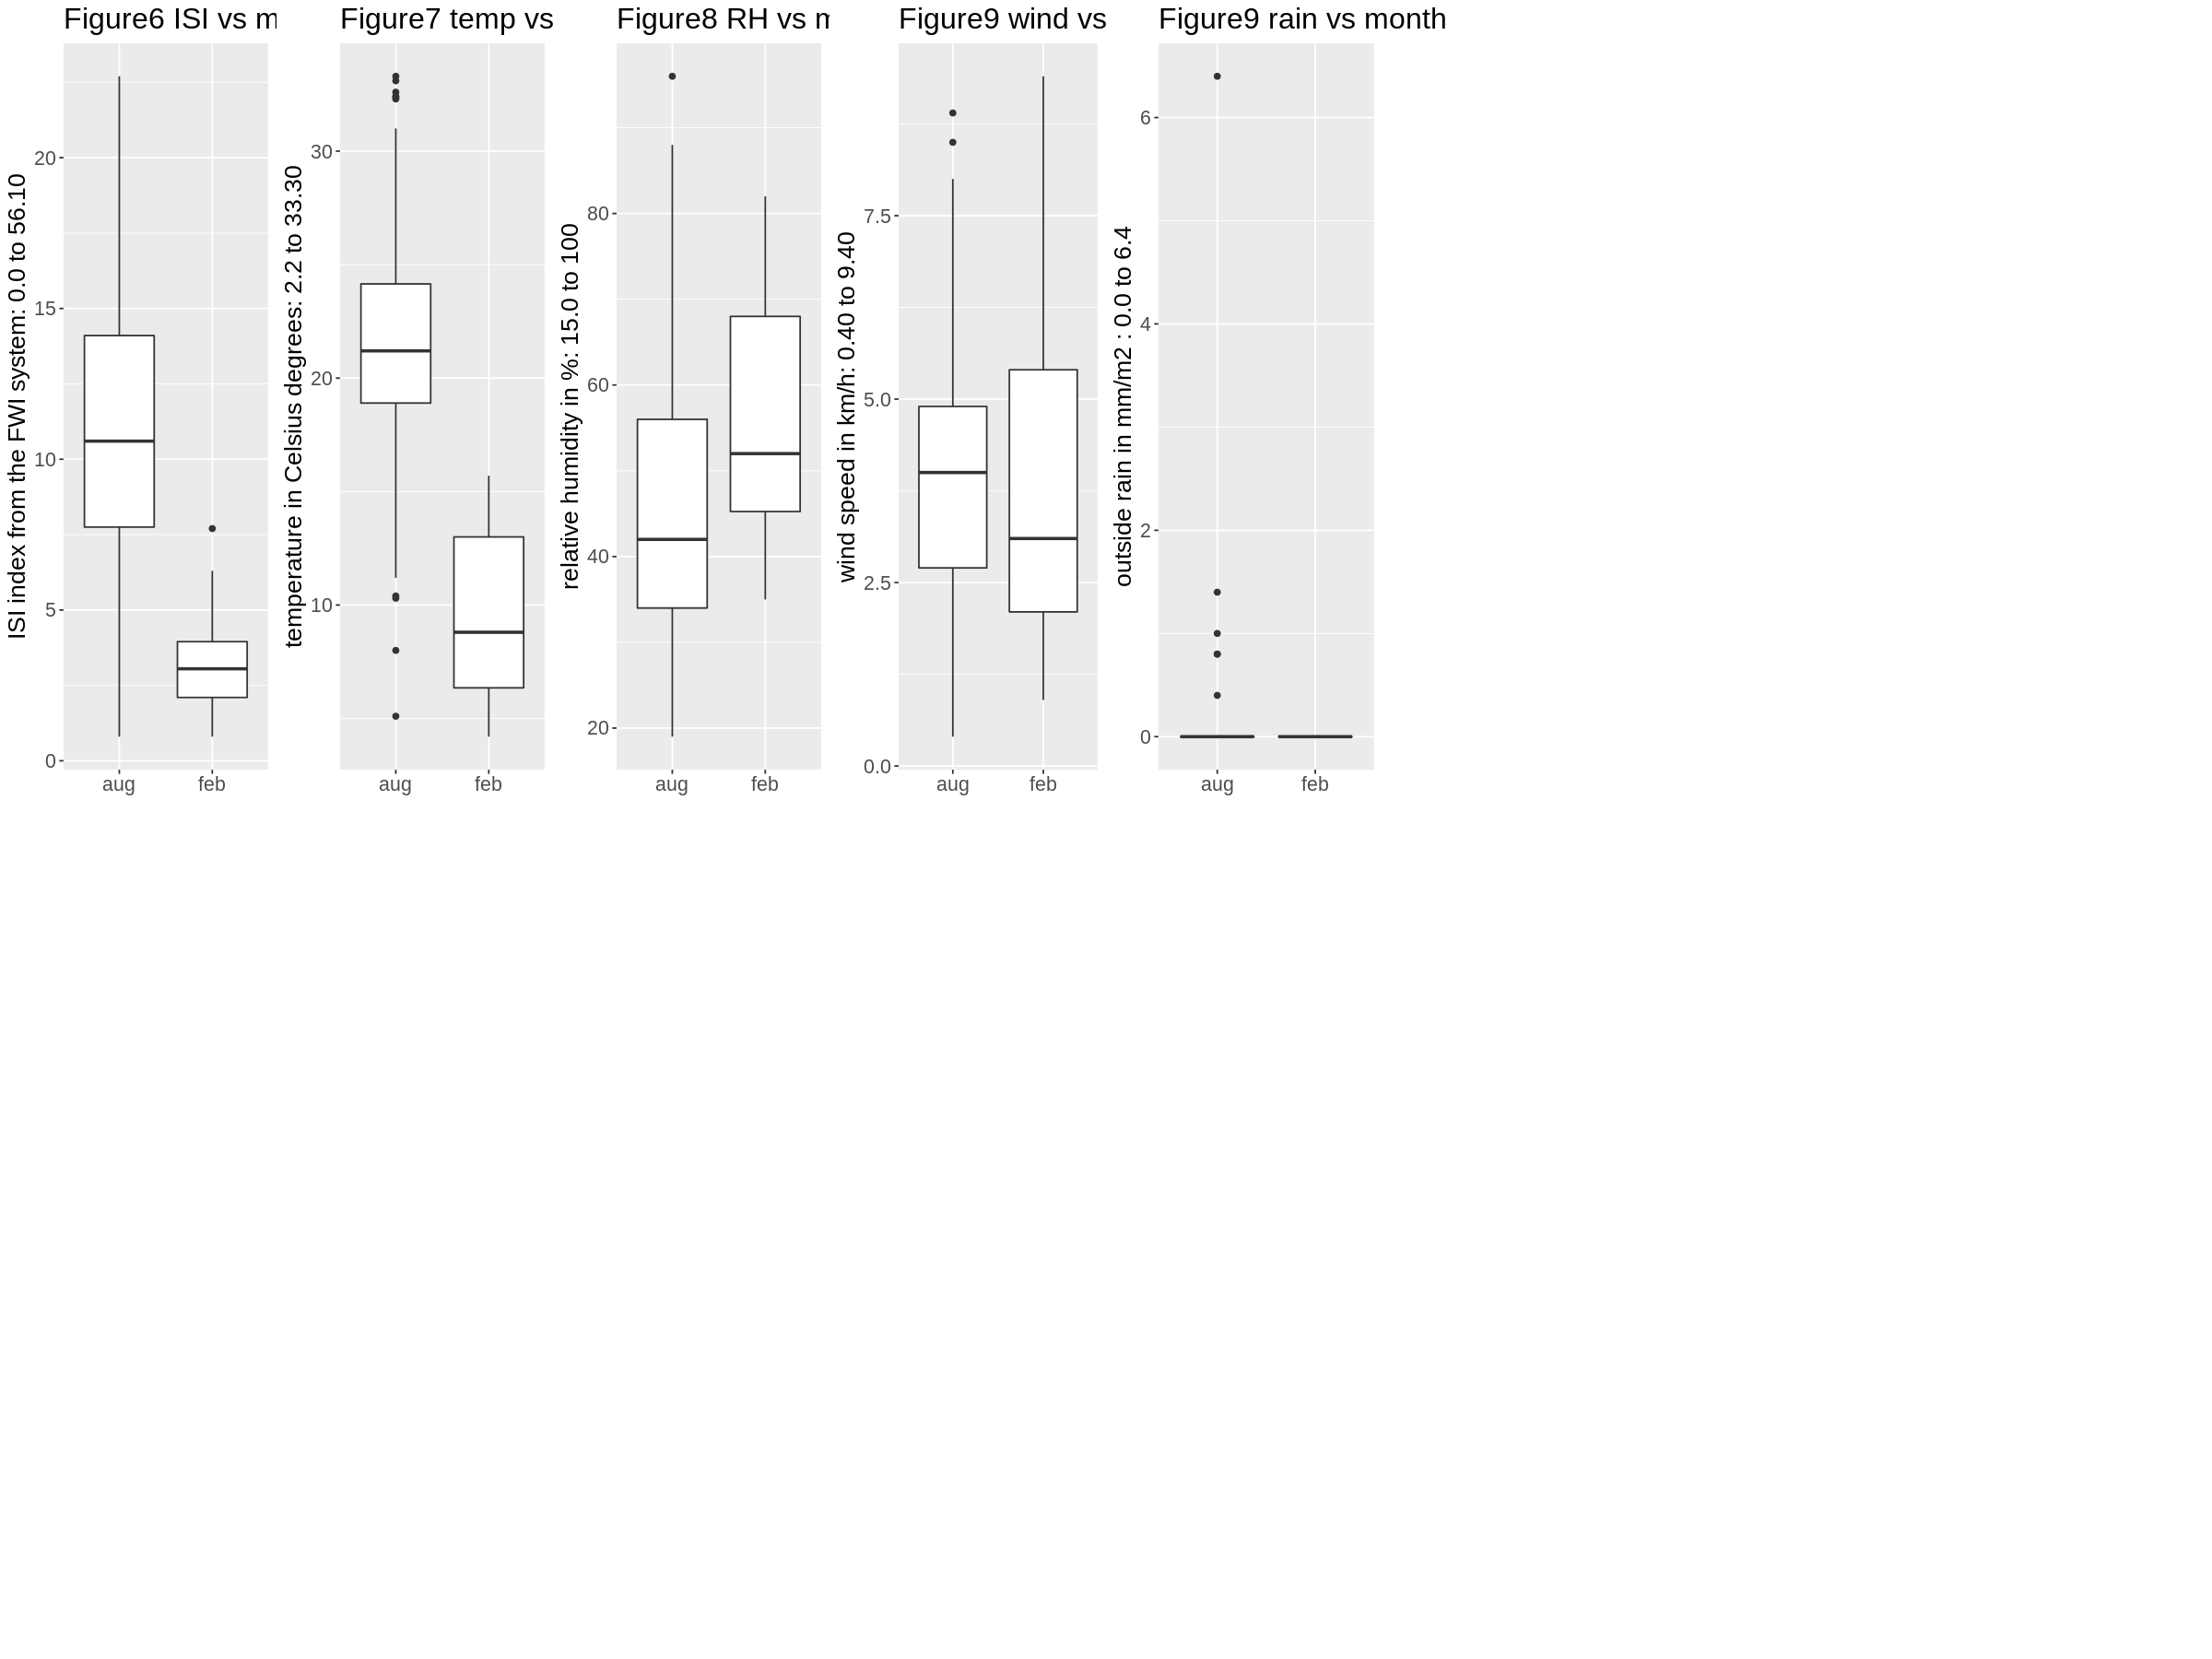

In [54]:
# Creat boxplot of all numeric variables
options(repr.plot.width = 20, repr.plot.height = 15)


# Since there is an outlier there, which rather affects our analysis, and then filter it out
forestfires_winter_summer <- forestfires_winter_summer |>
                             filter(area < 400)

X_month_plot <- ggplot(forestfires_winter_summer, aes(y = X, x = month)) +
    geom_boxplot()+
    labs(x = "", y = "x-axis spatial coordinate within the Montesinho park map: 1 to 9") +
    theme(text=element_text(size=16)) +                    
    labs(title = "Figure1 X vs month")

Y_month_plot <- ggplot(forestfires_winter_summer, aes(y = Y, x = month)) +
    geom_boxplot()+
    labs(x = "", y = "y-axis spatial coordinate within the Montesinho park map: 2 to 9") +
    theme(text=element_text(size=16)) +                    
    labs(title = "Figure2 Y vs month")

FFMC_month_plot <- ggplot(forestfires_winter_summer, aes(y = FFMC, x = month)) +
    geom_boxplot()+
    labs(x = "", y = "FFMC index from the FWI system: 18.7 to 96.20") +
    theme(text=element_text(size=16)) +                    
    labs(title = "Figure3 FFMC vs month")

DMC_month_plot <- ggplot(forestfires_winter_summer, aes(y = DMC, x = month)) +
    geom_boxplot()+
    labs(x = "", y = "DMC index from the FWI system: 1.1 to 291.3") +
    theme(text=element_text(size=16)) +                    
    labs(title = "Figure4 DMC vs month")

DC_month_plot <- ggplot(forestfires_winter_summer, aes(y = DC, x = month)) +
    geom_boxplot()+
    labs(x = "", y = "DC index from the FWI system: 7.9 to 860.6") +
    theme(text=element_text(size=16)) +                    
    labs(title = "Figure5 DC vs month")

ISI_month_plot <- ggplot(forestfires_winter_summer, aes(y = ISI, x = month)) +
    geom_boxplot()+
    labs(x = "", y = "ISI index from the FWI system: 0.0 to 56.10") +
    theme(text=element_text(size=16)) +                    
    labs(title = "Figure6 ISI vs month")

temp_month_plot <- ggplot(forestfires_winter_summer, aes(y = temp, x = month)) +
    geom_boxplot()+
    labs(x = "", y = "temperature in Celsius degrees: 2.2 to 33.30") +
    theme(text=element_text(size=16)) +                    
    labs(title = "Figure7 temp vs month")

RH_month_plot <- ggplot(forestfires_winter_summer, aes(y = RH, x = month)) +
    geom_boxplot()+
    labs(x = "", y = "relative humidity in %: 15.0 to 100") +
    theme(text=element_text(size=16)) +                    
    labs(title = "Figure8 RH vs month")

wind_month_plot <- ggplot(forestfires_winter_summer, aes(y = wind, x = month)) +
    geom_boxplot()+
    labs(x = "", y = "wind speed in km/h: 0.40 to 9.40") +
    theme(text=element_text(size=16)) +                    
    labs(title = "Figure9 wind vs month")

rain_month_plot <- ggplot(forestfires_winter_summer, aes(y = rain, x = month)) +
    geom_boxplot()+
    labs(x = "", y = "outside rain in mm/m2 : 0.0 to 6.4") +
    theme(text=element_text(size=16)) +                    
    labs(title = "Figure9 rain vs month")

area_month_plot <- forestfires_winter_summer|>
    ggplot(aes(y = area, x = month)) +
    geom_boxplot()+
    labs(x = "", y = "the burned area of the forest (in ha): 0.00 to 1090.84") +
    theme(text=element_text(size=16)) +                    
    labs(title = "Figure10 area vs month")

combined_month_plot_1 <-grid.arrange(X_month_plot, Y_month_plot, FFMC_month_plot, DMC_month_plot, DC_month_plot,
                                    ncol = 8, nrow=2.9) 

combined_month_plot_1 <-grid.arrange(ISI_month_plot, temp_month_plot, RH_month_plot, wind_month_plot, rain_month_plot,
                                    ncol = 8, nrow=2.95)

Keep month as the explanatory variable, temp and area as the response variable. 

In [57]:
# Clean and wangle the data set, drop the irrelevant rows and columns
forestfires <-forestfires_data |>
              filter(month %in% c("feb", "aug"), area < 400) |>
              select(month, temp, area)

# Calculate the mean and standard deviation of damage area
forestfires_summary <- forestfires %>% 
                       mutate(month = as.factor(month)) %>% 
                       summary()

forestfires_summary

 month          temp            area        
 aug:183   Min.   : 4.20   Min.   :  0.000  
 feb: 20   1st Qu.:17.40   1st Qu.:  0.000  
           Median :20.70   Median :  0.540  
           Mean   :20.42   Mean   :  8.262  
           3rd Qu.:23.90   3rd Qu.:  5.310  
           Max.   :33.30   Max.   :196.480  

Mean and standard deviation

In [63]:
# Temperature
temp_estimates<- forestfires %>%
           group_by(month) %>%
           summarize(mean = mean(temp),sd = sd(temp))
temp_estimates

month,mean,sd
<chr>,<dbl>,<dbl>
aug,21.59945,4.800670
feb,9.63500,3.972574


In [62]:
# Damage area
area_estimates<- forestfires %>%
           group_by(month) %>%
           summarize(mean = mean(area),sd = sd(area))
area_estimates

month,mean,sd
<chr>,<dbl>,<dbl>
aug,8.47929,26.25217
feb,6.27500,12.34251


In [92]:
temp_dist <- forestfires|> 
    ggplot(aes(x = temp, fill = month)) +
    geom_histogram(binwidth = 0.5, alpha = 0.4)+
    ggtitle("Distribution of Temperature")+
    geom_vline(data = temp_estimates, aes(xintercept = mean, color = month))

area_dist <- forestfires|> 
    ggplot(aes(x = area, fill = month)) +
    geom_histogram(binwidth = 3, alpha = 0.4)+
    ggtitle("Distribution of Damage Area")+
    geom_vline(data = area_estimates, aes(xintercept = mean, color = month))

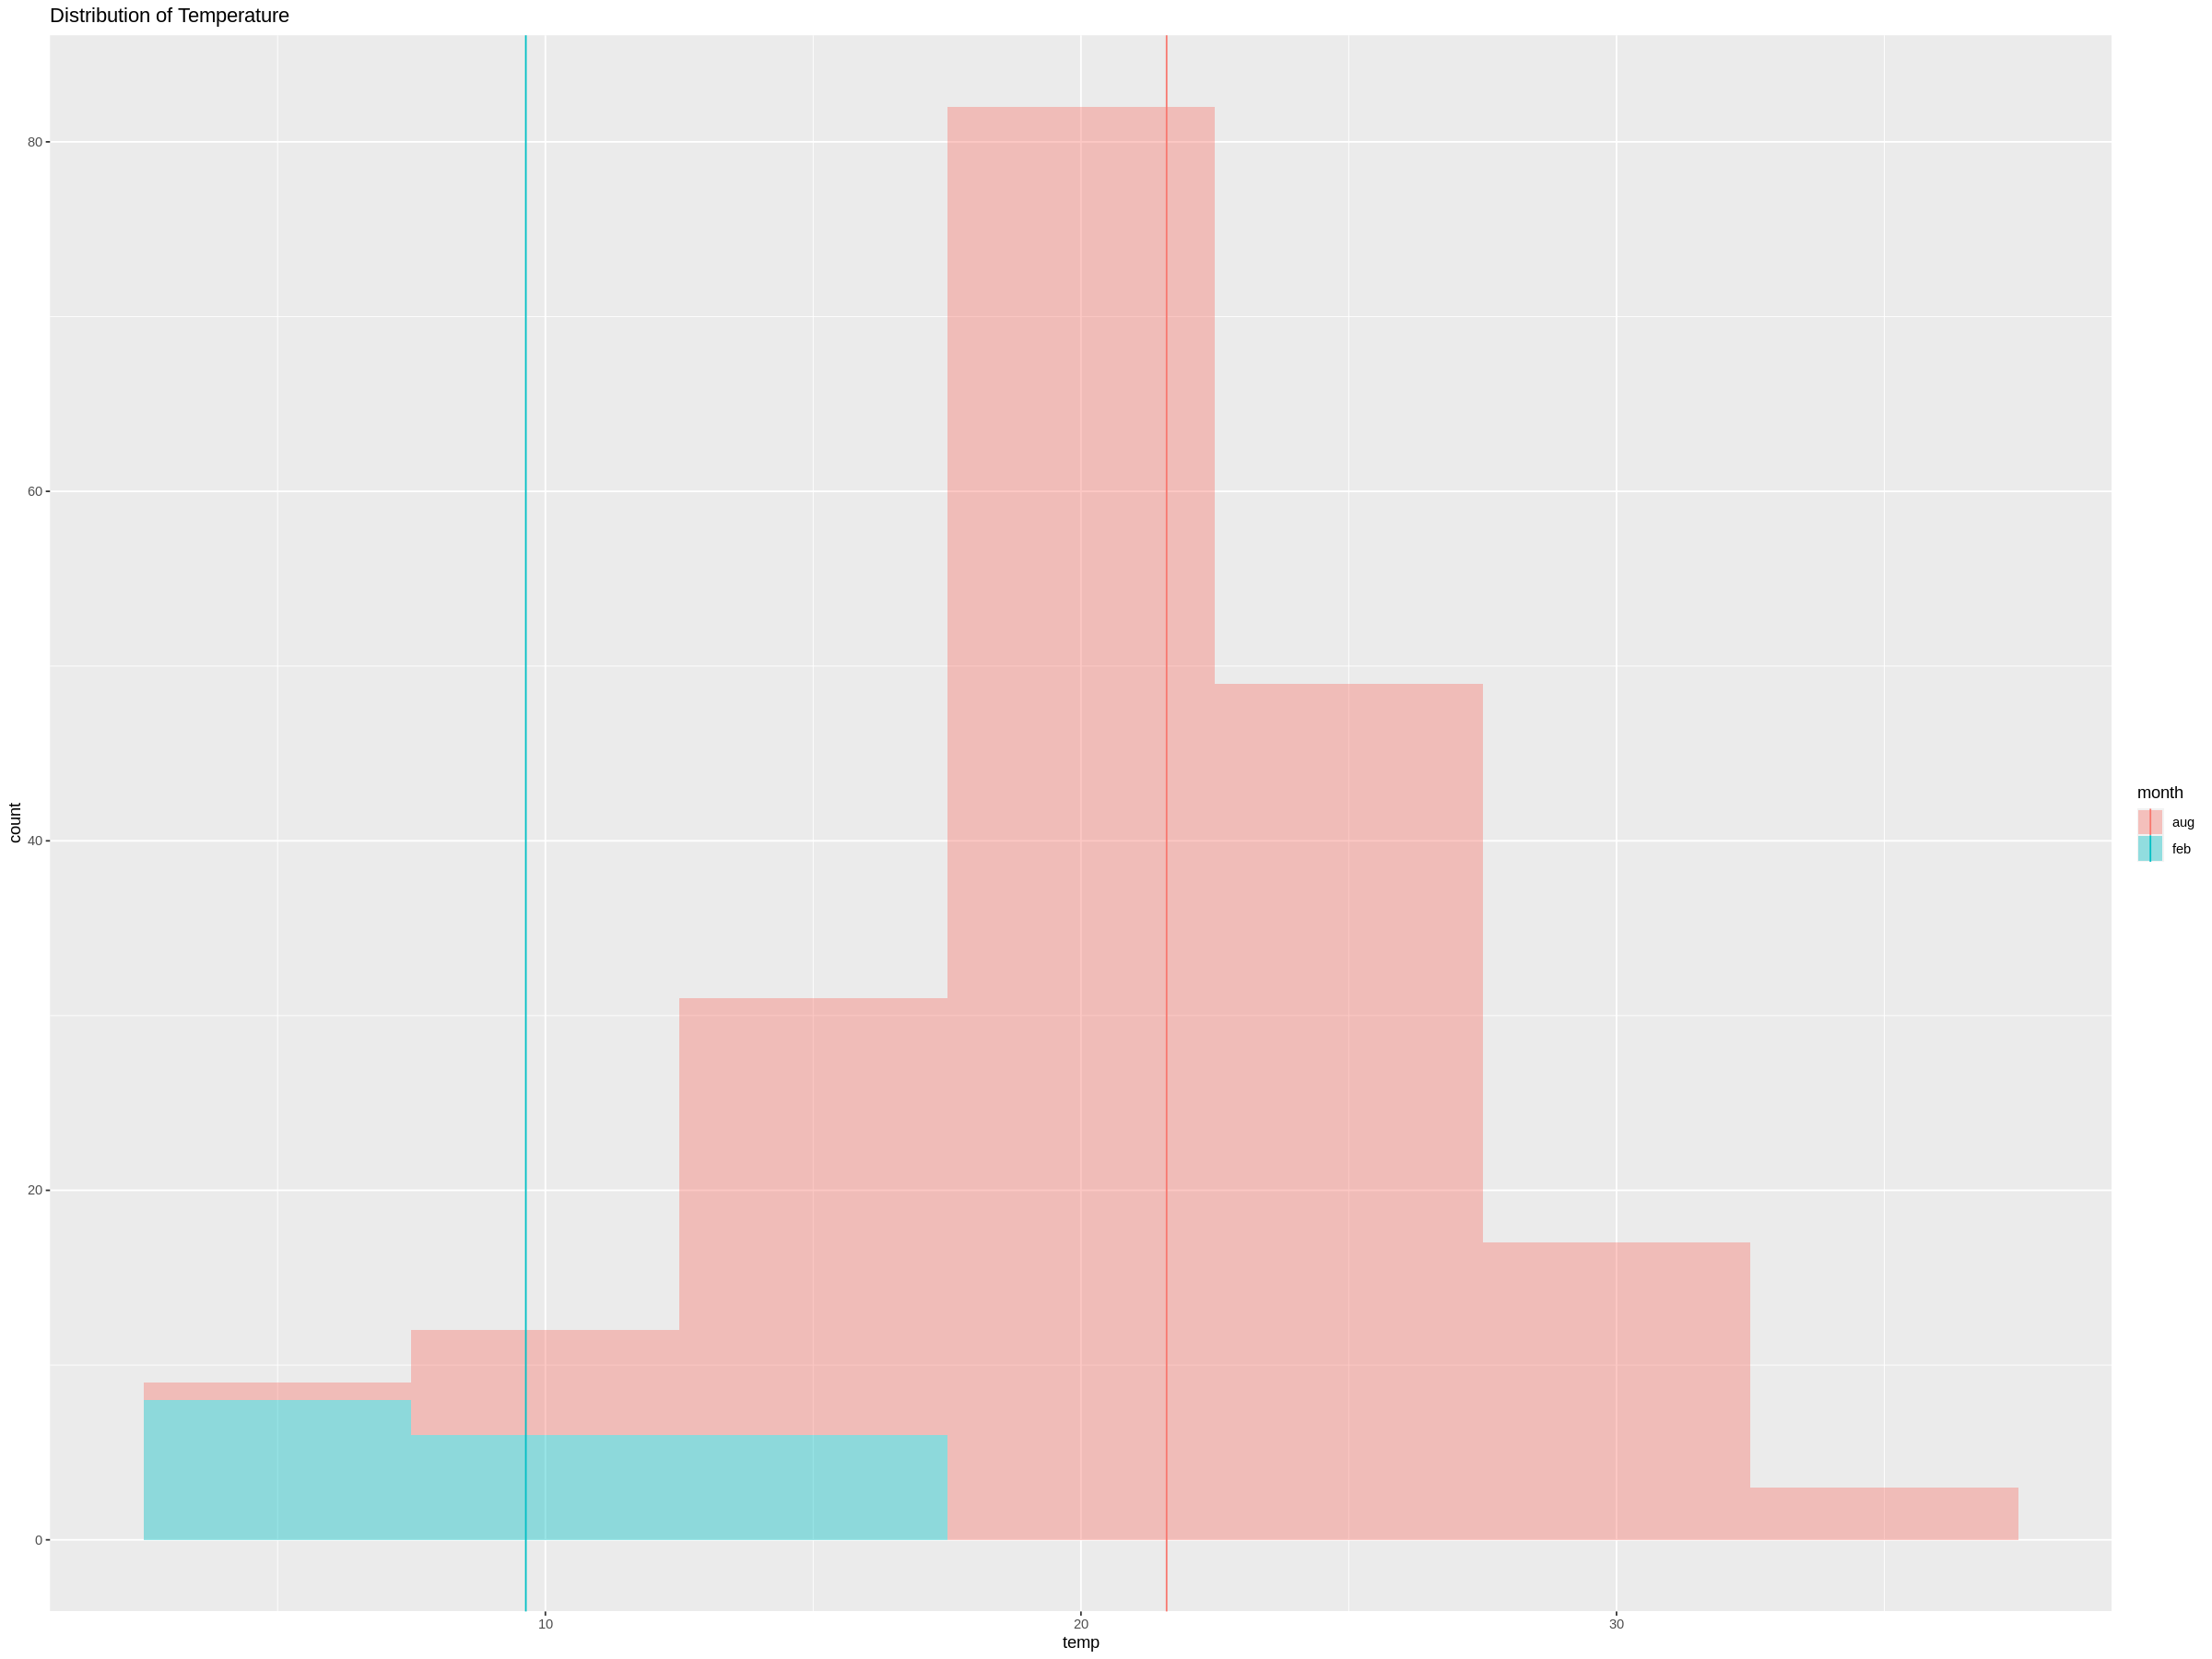

In [73]:
# Distribution of Temperature
temp_dist

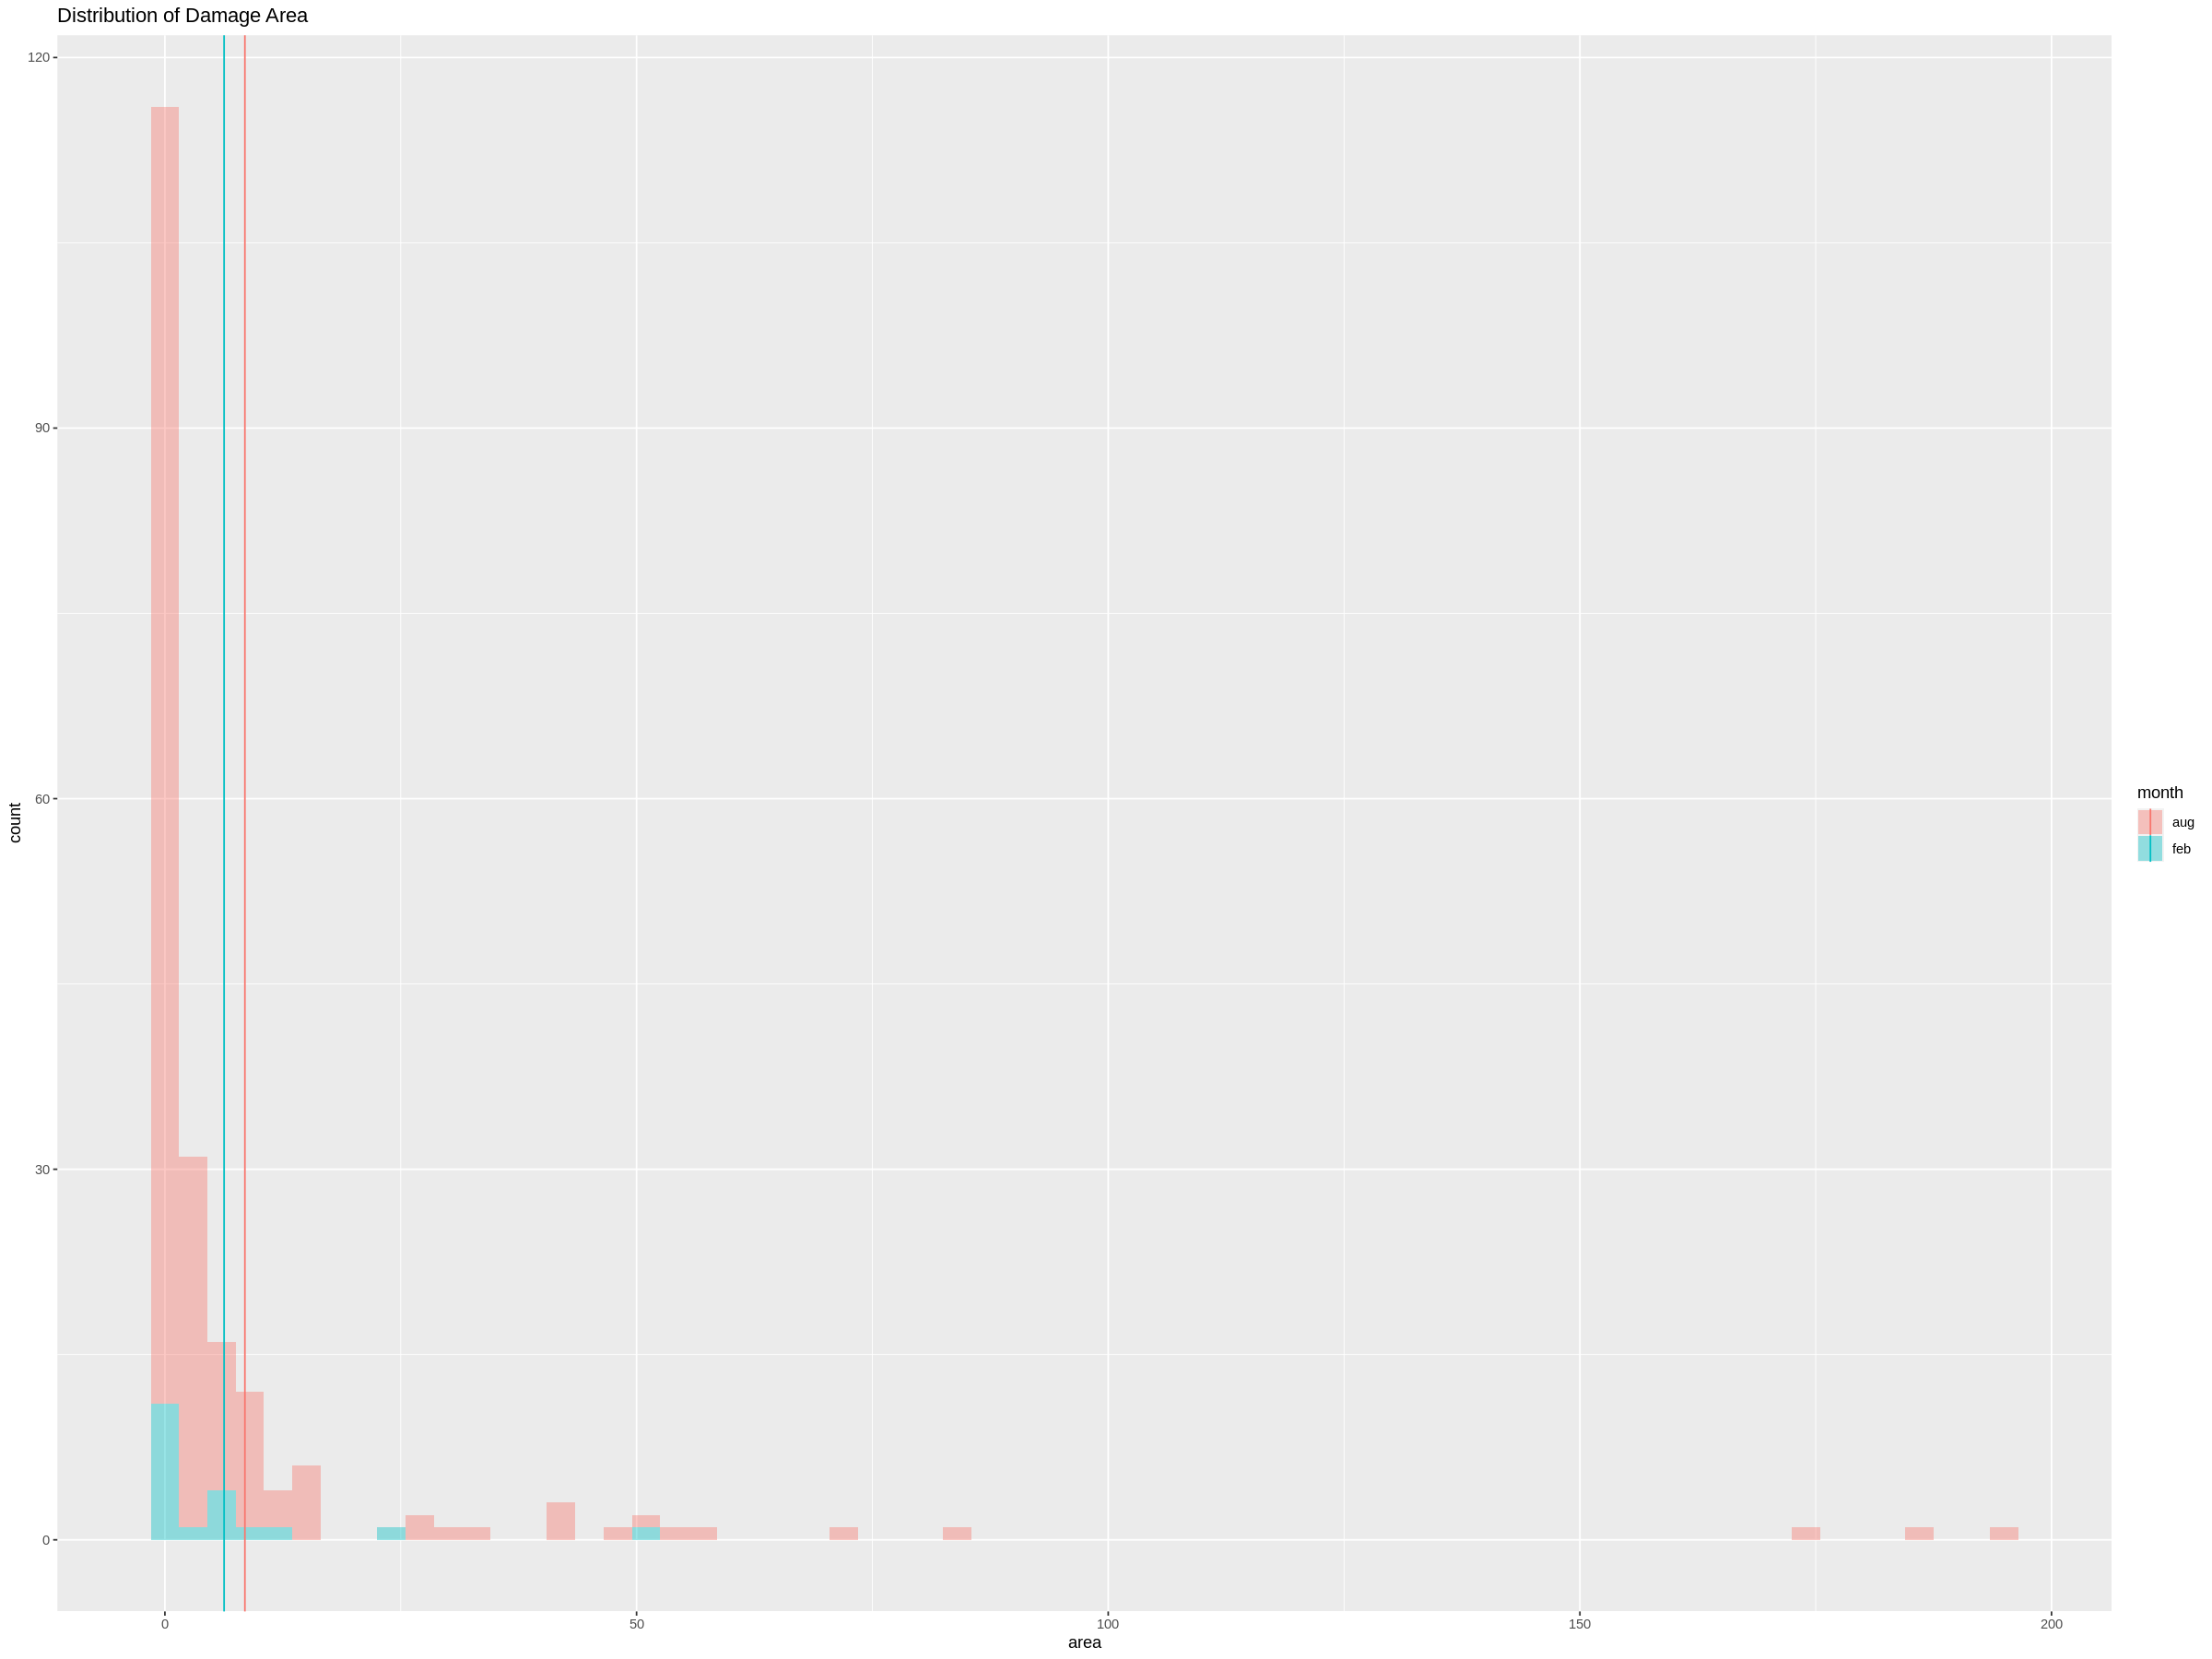

In [95]:
# Distribution of Damage Area
area_dist